In [1]:
import ipywidgets as widget
from dataset import Cells
from models import Encoder, Decoder, VAE
from graphics import Graphics
import numpy as np
import torch
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, IntSlider, interact, BoundedIntText
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
latent_size = 500

data = np.load("celle_data.npy")
train_data = Cells(data)
dataloader = torch.utils.data.DataLoader(
    train_data, batch_size=128,
    drop_last=True, shuffle=True)

encoder = Encoder(latent_size)
decoder = Decoder(latent_size)

vae = VAE(encoder, decoder)
plots = Graphics(vae, train_data)

vae.load_model("betavae")

Model loaded!


Finding interesting features..


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:30<00:00, 16.58it/s]


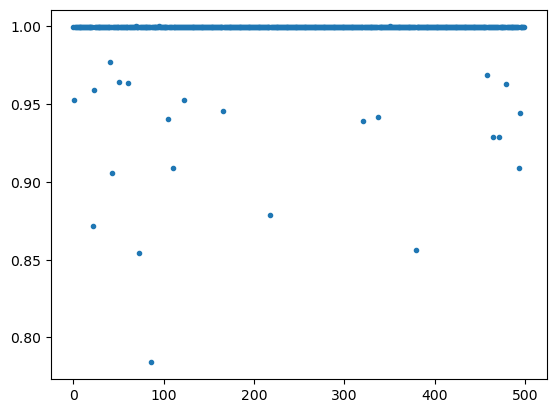

In [3]:
print("Finding interesting features..")
sim_scores = np.zeros(500)
space = torch.linspace(-4, 4, 10)
for i in tqdm(range(500)):
    zs = torch.zeros(11, 500)
    zs[1:, i] = space
    decodings = vae.decode(zs)
    sim = cosine_similarity(decodings[0,:].reshape(1,-1), decodings[1:,:])
    sim_scores[i] = np.mean(sim)

plt.plot(sim_scores, "o", ms=3)


In [4]:
def changing_feature(idx, value):
    random_z[int(idx)] = value
    encoding = vae.decode(random_z)
    plt.imshow(encoding.reshape(68,68,3))
    plt.xticks([])
    plt.yticks([])

In [11]:
random_z = torch.randn(500)
def interact_feature():
    ## Plot parameters

    ## Generate the user interface.
    idx_input = BoundedIntText(min=0, max=499, step=1)
    value_slider = value=FloatSlider(min=-4, max=4, step=0.1)
    
    interact(changing_feature, idx = idx_input, value = value_slider)

interact_feature();
print("The interesting features:")
print(np.where((sim_scores < 0.98))[0])

interactive(children=(BoundedIntText(value=0, description='idx', max=499), FloatSlider(value=0.0, description=…

The interesting features:
[  1  22  23  41  43  51  61  73  86 105 110 123 166 218 321 337 379 458
 464 471 479 493 494]
